In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Create or connect to database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# STEP 2: Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# STEP 3: Insert sample data
cursor.executemany("""
INSERT INTO sales (date, product, quantity, price) VALUES (?, ?, ?, ?)
""", [
    ('2025-06-01', 'Apple', 10, 2.5),
    ('2025-06-01', 'Banana', 5, 1.0),
    ('2025-06-02', 'Apple', 15, 2.5),
    ('2025-06-02', 'Orange', 8, 3.0),
    ('2025-06-03', 'Banana', 10, 1.0)
])


  product  total_qty  revenue
0   Apple         25     62.5
1  Banana         15     15.0
2  Orange          8     24.0


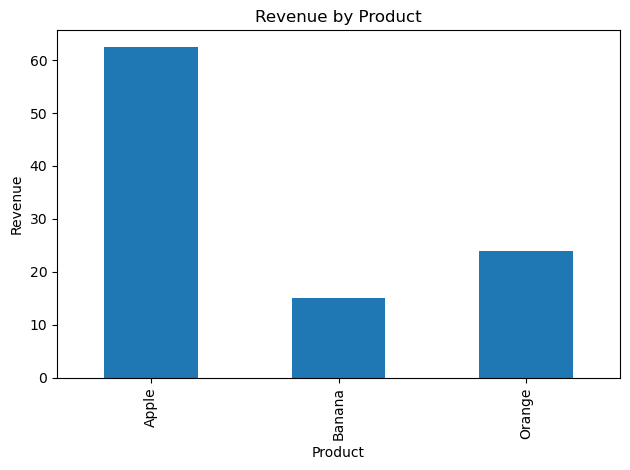

In [3]:
# STEP 4: Query total quantity and revenue
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print(df)

# STEP 5: Plot revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# Close the connection
conn.close()
